In [1]:
%%capture
from re import sub
from pandas import DataFrame, ExcelWriter
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotnine import *

from sys import path 
path.insert(0, '../core/')

from agyw import AgywPrev, AgywPrevCommune
from active import actif_served as AGYW_ACTIF


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

date_du_jour = datetime.today().strftime("%d_%m_%Y")

In [2]:
%%capture
datim = AgywPrev()

In [3]:
datim.datim_titleI()

'Number of active DREAMS participants that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package as of the past 6 months at Q2 or the past 12 months at Q4.'

In [4]:
datim.total_mastersheet 
datim.total_dreams_valid
datim.who_am_i
datim.total_datimI
datim.total_datimII
datim.total_datimIII
datim.total_datimIV
datim.total_datim_general
AgywPrev.datim_titleI()
datim.datim_agyw_prevI()
AgywPrev.datim_titleII()
datim.datim_agyw_prevII()
AgywPrev.datim_titleIII()
datim.datim_agyw_prevIII()
AgywPrev.datim_titleIV()
datim.datim_agyw_prevIV()
datim.datim_vital_info()


1620

1506

'DATIM'

265

1019

222

0

1506

'Number of active DREAMS participants that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package as of the past 6 months at Q2 or the past 12 months at Q4.'

,Time/Age/Sex,10-14,15-19,20-24,25-29
1,0-6 months,0,178,42,0
2,07-12 months,0,19,5,0
3,13-24 months,0,13,3,0
4,25+ months,0,3,2,0
5,Total,0,213,52,0


'Number of active DREAMS participants that have\xa0fully completed\xa0the entire DREAMS primary package of services AND at least one additional secondary service as of the past 6 months at Q2 or the past 12 months at Q4.'

,Time/Age/Sex,10-14,15-19,20-24,25-29
1,0-6 months,221,5,4,0
2,07-12 months,45,7,3,0
3,13-24 months,25,15,21,0
4,25+ months,147,269,257,0
5,Total,438,296,285,0


'Number of active DREAMS participants that have fully completed at least one DREAMS service/intervention but NOT the full primary package of services/interventions as of the past 6 months at Q2 or the past 12 months at Q4.'

,Time/Age/Sex,10-14,15-19,20-24,25-29
1,0-6 months,14,13,5,0
2,07-12 months,1,5,0,0
3,13-24 months,7,11,15,0
4,25+ months,28,66,57,0
5,Total,50,95,77,0


'Number of active DREAMS participants that have started a DREAMS service but have not yet completed it in the past 6 months at Q2 or 12 months at Q4.'

,Time/Age/Sex,10-14,15-19,20-24,25-29
0,0-6 months,0,0,0,0
1,07-12 months,0,0,0,0
2,13-24 months,0,0,0,0
3,25+ months,0,0,0,0
4,Total,0,0,0,0


,Number of active DREAMS participants that received an evidence-based intervention focused on preventing violence within the reporting period.,1284
1,Number of active DREAMS participants that rece...,0
2,Number of active DREAMS participants that comp...,911


In [5]:
%%capture
def name_handler(s):
    s = sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespace with a single dash
    s = sub(r"\s+", '_', s)
    return s

datimcommunes = []

for columns in AGYW_ACTIF.commune.unique():
    globals()[f"datim_{name_handler(columns)}"] = AgywPrevCommune(f"{columns}")
    datimcommunes.append(globals().get(f"datim_{name_handler(columns)}"))


for dcommunes in datimcommunes:
  dcommunes.total_mastersheet 
  dcommunes.total_dreams_valid
  dcommunes.who_am_i
  dcommunes.total_datimI
  dcommunes.total_datimII
  dcommunes.total_datimIII
  dcommunes.total_datimIV
  dcommunes.total_datim_general
  AgywPrevCommune.datim_titleI()
  dcommunes.datim_agyw_prevI()
  AgywPrevCommune.datim_titleII()
  dcommunes.datim_agyw_prevII()
  AgywPrevCommune.datim_titleIII()
  dcommunes.datim_agyw_prevIII()
  AgywPrevCommune.datim_titleIV()
  dcommunes.datim_agyw_prevIV()
  print(" ")
  print(" ")
  print(" ")
  print(" ")

In [6]:
datim

<AgywPrev DATIM>

1506

(<Figure size 1600x800 with 1 Axes>, <AxesSubplot: >)

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 0.98, 'AGYW_PREV datim indicator  and the periodic target')

Text(0.0, 4000.0, '8000')

Text(1.0, 753.0, '1506')

Text(-80, -20, 'source: HIVHaiti')

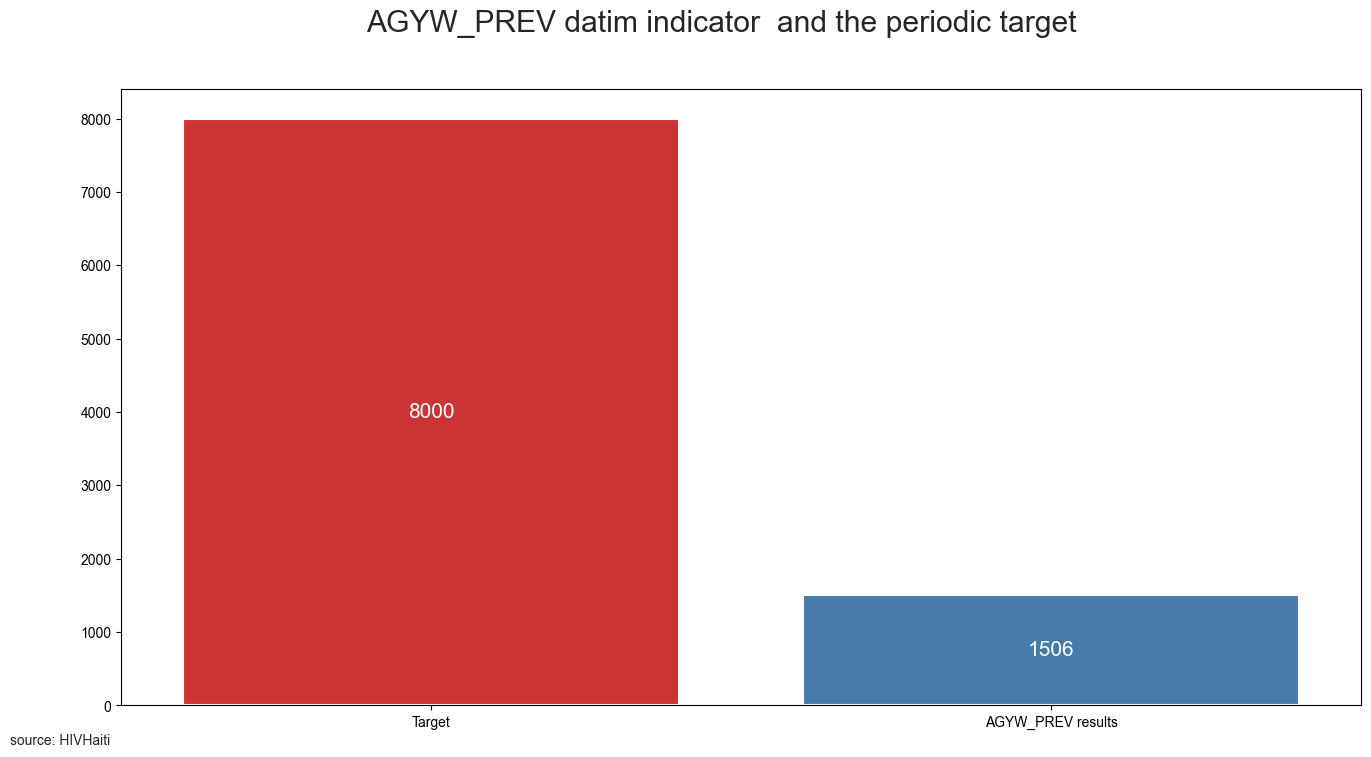

In [7]:



datim.total_datim_general
target= 8000

data_plot = DataFrame({"state":["Target","AGYW_PREV results"],
                            "data": [target,datim.total_datim_general]                        
})


plt.subplots(figsize=(16,8))
sns.set_theme(style="whitegrid", context="talk")
sns.set_style("darkgrid")
sns.set_palette('Set1')
splot = sns.barplot(x="state",y="data",data=data_plot)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle("AGYW_PREV datim indicator  and the periodic target")
for p in splot.patches:
    height = p.get_height()
    plt.text(
                p.get_x() + p.get_width()/2, 
                0.5*p.get_height() + p.get_y(),
                '{:1.0f}'.format(height), 
                ha='center', va='center',
                size=15,
                fontdict=dict(color="white")
            )
    
plt.annotate(
    "source: HIVHaiti",(0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top'
)
plt.savefig("agyw_prev_evolution",dpi=1000)

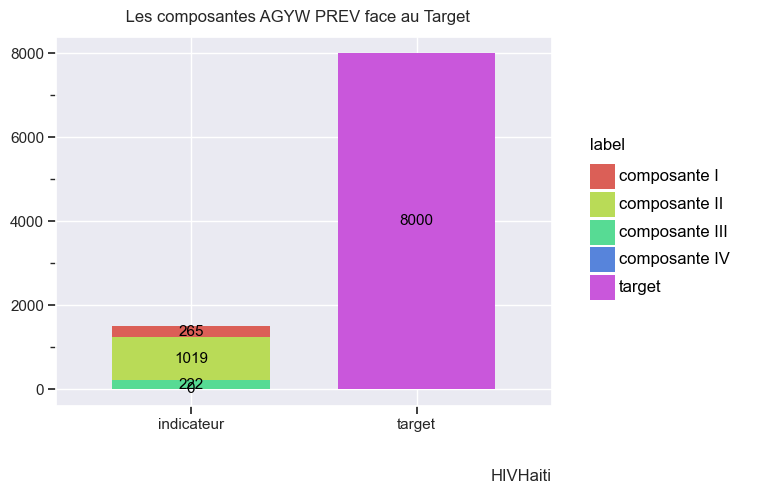

<ggplot: (323175376)>

/usr/local/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: composante_agywprev.png


In [8]:
stack_data = DataFrame( 
                  {     
                        "supp":["target","indicateur","indicateur","indicateur",'indicateur'],
                        "label": ["target","composante I","composante II","composante III", 'composante IV'],
                        "data": [target,datim.total_datimI,
                                datim.total_datimII,
                                datim.total_datimIII,datim.total_datimIV]
})

p = (ggplot(stack_data,aes(x="supp",y="data",fill="label",width=0.7)) 
 + geom_bar(position=position_stack(vjust=0.5),stat="identity")
 + geom_text(aes(label="data"),position=position_stack(vjust=0.5))
 + ggtitle(" Les composantes AGYW PREV face au Target")
 + xlab("")
 +ylab("")
 +labs(caption =  "HIVHaiti")
 + theme_seaborn()
)
p
ggsave(plot=p,filename="composante_agywprev.png",dpi=1000)

In [23]:
agyw_per_commune = datim.data_dreams_valid.pivot_table(
    values="id_patient",
    index="commune",
    columns="age_range",
    aggfunc="count",
    fill_value=0,
    margins=True,
    margins_name="Total"
)[:-1].sort_values("Total",ascending=False)
agyw_per_commune

age_range,10-14,15-19,20-24,Total
commune,,,,
Saint-Marc,86,137,57,280
Verrettes,78,110,72,260
Grande Saline,53,86,92,231
Montrouis,91,74,28,193
Desdunes,54,53,51,158
Petite Rivière de l'Artibonite,26,31,25,82
Liancourt,12,43,15,70
Dessalines,39,8,6,53
Cap-Haïtien,7,15,17,39


In [25]:
usaid_verification = ExcelWriter(f"./tables_verification/datim_verification.xlsx",engine="xlsxwriter")
agyw_per_commune.to_excel(usaid_verification,sheet_name="agyw_per_commune",index=True,na_rep="")
datim.data_agyw_prevI.to_excel(usaid_verification,sheet_name="composante I",index=False,na_rep="")
datim.data_agyw_prevII.to_excel(usaid_verification,sheet_name="composante II",index=False,na_rep="")
datim.data_agyw_prevIII.to_excel(usaid_verification,sheet_name="Composante III",index=False,na_rep="")
datim.data_agyw_prevIV.to_excel(usaid_verification,sheet_name="Composante IV",index=False,na_rep="")
datim.data_dreams_valid.to_excel(usaid_verification,sheet_name="table_global",index=False,na_rep="")
usaid_verification.save()



""" usaid_verification = ExcelWriter(f"./tables_verification/datim_verification_{date_du_jour}.xlsx",engine="xlsxwriter")
datim.data_agyw_prevI.to_excel(usaid_verification,sheet_name="composante I",index=False,na_rep="")
datim.data_agyw_prevII.to_excel(usaid_verification,sheet_name="composante II",index=False,na_rep="")
datim.data_agyw_prevIII.to_excel(usaid_verification,sheet_name="Composante III",index=False,na_rep="")
datim.data_agyw_prevIV.to_excel(usaid_verification,sheet_name="Composante IV",index=False,na_rep="")
datim.data_dreams_valid.to_excel(usaid_verification,sheet_name="table_global",index=False,na_rep="")
usaid_verification.save() """


""" usaid_verification = ExcelWriter(f"./tables_verification/ONFY21/datim_verification.xlsx",engine="xlsxwriter")
datim.data_agyw_prevI.to_excel(usaid_verification,sheet_name="composante I",index=False,na_rep="")
datim.data_agyw_prevII.to_excel(usaid_verification,sheet_name="composante II",index=False,na_rep="")
datim.data_agyw_prevIII.to_excel(usaid_verification,sheet_name="Composante III",index=False,na_rep="")
datim.data_agyw_prevIV.to_excel(usaid_verification,sheet_name="Composante IV",index=False,na_rep="")
datim.data_dreams_valid.to_excel(usaid_verification,sheet_name="table_global",index=False,na_rep="")
usaid_verification.save() """

""" usaid_verification = ExcelWriter(f"./tables_verification/Q3/datim_verification_{date_du_jour}.xlsx",engine="xlsxwriter")
datim.data_agyw_prevI.to_excel(usaid_verification,sheet_name="composante I",index=False,na_rep="")
datim.data_agyw_prevII.to_excel(usaid_verification,sheet_name="composante II",index=False,na_rep="")
datim.data_agyw_prevIII.to_excel(usaid_verification,sheet_name="Composante III",index=False,na_rep="")
datim.data_agyw_prevIV.to_excel(usaid_verification,sheet_name="Composante IV",index=False,na_rep="")
datim.data_dreams_valid.to_excel(usaid_verification,sheet_name="table_global",index=False,na_rep="")
usaid_verification.save() """ 

""" usaid_verification = ExcelWriter(f"./tables_verification/Q2/datim_verification_{date_du_jour}.xlsx",engine="xlsxwriter")
datim.data_agyw_prevI.to_excel(usaid_verification,sheet_name="composante I",index=False,na_rep="")
datim.data_agyw_prevII.to_excel(usaid_verification,sheet_name="composante II",index=False,na_rep="")
datim.data_agyw_prevIII.to_excel(usaid_verification,sheet_name="Composante III",index=False,na_rep="")
datim.data_agyw_prevIV.to_excel(usaid_verification,sheet_name="Composante IV",index=False,na_rep="")
datim.data_dreams_valid.to_excel(usaid_verification,sheet_name="table_global",index=False,na_rep="")
usaid_verification.save() """



""" usaid_verification = ExcelWriter(f"./tables_verification/special/datim_verification_{date_du_jour}.xlsx",engine="xlsxwriter")
datim.data_agyw_prevI.to_excel(usaid_verification,sheet_name="composante I",index=False,na_rep="")
datim.data_agyw_prevII.to_excel(usaid_verification,sheet_name="composante II",index=False,na_rep="")
datim.data_agyw_prevIII.to_excel(usaid_verification,sheet_name="Composante III",index=False,na_rep="")
datim.data_agyw_prevIV.to_excel(usaid_verification,sheet_name="Composante IV",index=False,na_rep="")
datim.data_dreams_valid.to_excel(usaid_verification,sheet_name="table_global",index=False,na_rep="")
usaid_verification.save() """  

/var/folders/7v/rs0k237d6nj3vdxfc1h7xtcw0000gn/T/ipykernel_8188/4155194522.py:8: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version


' usaid_verification = ExcelWriter(f"./tables_verification/datim_verification_{date_du_jour}.xlsx",engine="xlsxwriter")\ndatim.data_agyw_prevI.to_excel(usaid_verification,sheet_name="composante I",index=False,na_rep="")\ndatim.data_agyw_prevII.to_excel(usaid_verification,sheet_name="composante II",index=False,na_rep="")\ndatim.data_agyw_prevIII.to_excel(usaid_verification,sheet_name="Composante III",index=False,na_rep="")\ndatim.data_agyw_prevIV.to_excel(usaid_verification,sheet_name="Composante IV",index=False,na_rep="")\ndatim.data_dreams_valid.to_excel(usaid_verification,sheet_name="table_global",index=False,na_rep="")\nusaid_verification.save() '

' usaid_verification = ExcelWriter(f"./tables_verification/ONFY21/datim_verification.xlsx",engine="xlsxwriter")\ndatim.data_agyw_prevI.to_excel(usaid_verification,sheet_name="composante I",index=False,na_rep="")\ndatim.data_agyw_prevII.to_excel(usaid_verification,sheet_name="composante II",index=False,na_rep="")\ndatim.data_agyw_prevIII.to_excel(usaid_verification,sheet_name="Composante III",index=False,na_rep="")\ndatim.data_agyw_prevIV.to_excel(usaid_verification,sheet_name="Composante IV",index=False,na_rep="")\ndatim.data_dreams_valid.to_excel(usaid_verification,sheet_name="table_global",index=False,na_rep="")\nusaid_verification.save() '

' usaid_verification = ExcelWriter(f"./tables_verification/Q3/datim_verification_{date_du_jour}.xlsx",engine="xlsxwriter")\ndatim.data_agyw_prevI.to_excel(usaid_verification,sheet_name="composante I",index=False,na_rep="")\ndatim.data_agyw_prevII.to_excel(usaid_verification,sheet_name="composante II",index=False,na_rep="")\ndatim.data_agyw_prevIII.to_excel(usaid_verification,sheet_name="Composante III",index=False,na_rep="")\ndatim.data_agyw_prevIV.to_excel(usaid_verification,sheet_name="Composante IV",index=False,na_rep="")\ndatim.data_dreams_valid.to_excel(usaid_verification,sheet_name="table_global",index=False,na_rep="")\nusaid_verification.save() '

' usaid_verification = ExcelWriter(f"./tables_verification/Q2/datim_verification_{date_du_jour}.xlsx",engine="xlsxwriter")\ndatim.data_agyw_prevI.to_excel(usaid_verification,sheet_name="composante I",index=False,na_rep="")\ndatim.data_agyw_prevII.to_excel(usaid_verification,sheet_name="composante II",index=False,na_rep="")\ndatim.data_agyw_prevIII.to_excel(usaid_verification,sheet_name="Composante III",index=False,na_rep="")\ndatim.data_agyw_prevIV.to_excel(usaid_verification,sheet_name="Composante IV",index=False,na_rep="")\ndatim.data_dreams_valid.to_excel(usaid_verification,sheet_name="table_global",index=False,na_rep="")\nusaid_verification.save() '

' usaid_verification = ExcelWriter(f"./tables_verification/special/datim_verification_{date_du_jour}.xlsx",engine="xlsxwriter")\ndatim.data_agyw_prevI.to_excel(usaid_verification,sheet_name="composante I",index=False,na_rep="")\ndatim.data_agyw_prevII.to_excel(usaid_verification,sheet_name="composante II",index=False,na_rep="")\ndatim.data_agyw_prevIII.to_excel(usaid_verification,sheet_name="Composante III",index=False,na_rep="")\ndatim.data_agyw_prevIV.to_excel(usaid_verification,sheet_name="Composante IV",index=False,na_rep="")\ndatim.data_dreams_valid.to_excel(usaid_verification,sheet_name="table_global",index=False,na_rep="")\nusaid_verification.save() '